# Hoshen-Kopelman Algorithm
## Packages

In [50]:
include("../Percolation.jl")
using Plots, ColorSchemes, LaTeXStrings, DelimitedFiles
import PyPlot as plt

## Configurations

In [51]:
figpath = "../../fig/percolation/"
rcParams = plt.PyDict(plt.matplotlib["rcParams"])
rcParams["text.usetex"] = true

true

## Labeling

In [71]:
prob, len = 0.5, 50
percent = Integer(round(prob * 100))

50

In [47]:
grid = rand(len, len) .<= prob

percolates, labels, _ = Percolation.hkpercolate(grid)
_, colors, _ = Percolation.hkpercolate(grid, color=true)
print(percolates)

# save data
open("label-$percent.txt", "w") do io
    writedlm(io, labels)
end
open("color-$percent.txt", "w") do io
    writedlm(io, colors)
end

true

In [72]:
# load data from previous runs
labels = readdlm("label-$percent.txt", Int)
colors = readdlm("color-$percent.txt", Int)
# state of percolation
print(any(colors[end, :] .== maximum(colors)))

true

## Heat Map

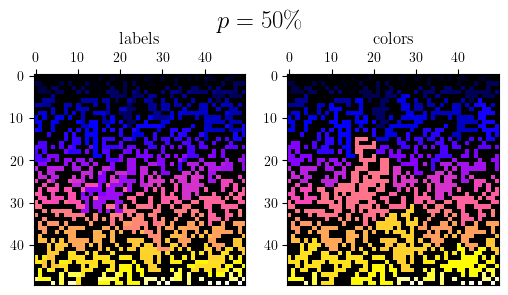

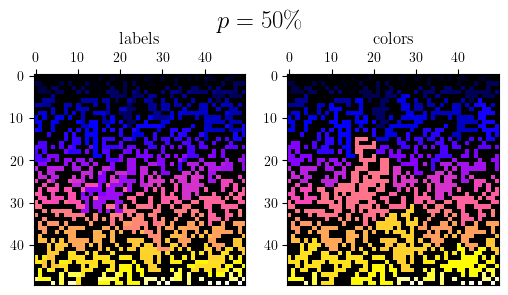

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3.5))
fig.suptitle(L"p=%$percent\%", fontsize=18)
axs[1].xaxis.tick_top()
axs[2].xaxis.tick_top()

axs[1].set_title(L"\textrm{labels}")
axs[1].imshow(labels, cmap="gnuplot2")
axs[2].set_title(L"\textrm{colors}")
axs[2].imshow(colors, cmap="gnuplot2")

plt.savefig(figpath * "hk-$percent.pdf", bbox_inches="tight")
display(fig)